# Classifying newswires

## Multiclass classification example

In [1]:
%tensorflow_version 2.x


import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


In [0]:
import numpy as np
from tensorflow.python.keras import models, layers
from tensorflow.python.keras.utils.np_utils import to_categorical

## Importing the data set

In [0]:
from tensorflow.python.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
print(len(train_data))
print(len(test_data))

8982
2246


In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [0]:
offset = 3
word_to_id = reuters.get_word_index()
word_to_id = {k:v+offset for k, v in word_to_id.items()}
word_to_id['<PAD>'] = 0
word_to_id['<START>'] = 1
word_to_id['<UNK>'] = 2
id_to_word = {v:k for k, v in word_to_id.items()}


In [7]:
print(' '.join(id_to_word[word_id] for word_id in train_data[10]))

<START> period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3


In [0]:
def vectorize_sequences(sequences, dimensions=10000):
  results = np.zeros((len(sequences), dimensions))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [0]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## Model definition

In [0]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## Training

In [13]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 255us/sample - loss: 2.6937 - accuracy: 0.5044 - val_loss: 1.7486 - val_accuracy: 0.6200
Epoch 2/20
7982/7982 [==============================] - 1s 136us/sample - loss: 1.4242 - accuracy: 0.7061 - val_loss: 1.3241 - val_accuracy: 0.6970
Epoch 3/20
7982/7982 [==============================] - 1s 138us/sample - loss: 1.0396 - accuracy: 0.7860 - val_loss: 1.1118 - val_accuracy: 0.7640
Epoch 4/20
7982/7982 [==============================] - 1s 138us/sample - loss: 0.8150 - accuracy: 0.8311 - val_loss: 1.0099 - val_accuracy: 0.7930
Epoch 5/20
7982/7982 [==============================] - 1s 139us/sample - loss: 0.6457 - accuracy: 0.8663 - val_loss: 0.9647 - val_accuracy: 0.7940
Epoch 6/20
7982/7982 [==============================] - 1s 134us/sample - loss: 0.5173 - accuracy: 0.8956 - val_loss: 0.9141 - val_accuracy: 0.8140
Epoch 7/20
7982/7982 [==============================] - 1s 134us

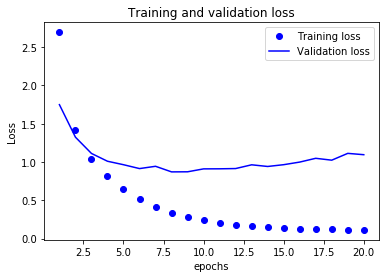

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

*Observations*: seems to overfit after nine epochs.

In [15]:
# Retraining over 9 epochs
model.fit(partial_X_train,
          partial_y_train,
          batch_size=512,
          epochs=9,
          validation_data=(X_val, y_val))
results = model.evaluate(X_test, y_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 140us/sample - loss: 0.1104 - accuracy: 0.9585 - val_loss: 1.1053 - val_accuracy: 0.8040
Epoch 2/9
7982/7982 [==============================] - 1s 135us/sample - loss: 0.1081 - accuracy: 0.9598 - val_loss: 1.1160 - val_accuracy: 0.8010
Epoch 3/9
7982/7982 [==============================] - 1s 134us/sample - loss: 0.1030 - accuracy: 0.9579 - val_loss: 1.1510 - val_accuracy: 0.7960
Epoch 4/9
7982/7982 [==============================] - 1s 138us/sample - loss: 0.1036 - accuracy: 0.9564 - val_loss: 1.1154 - val_accuracy: 0.7980
Epoch 5/9
7982/7982 [==============================] - 1s 135us/sample - loss: 0.1008 - accuracy: 0.9570 - val_loss: 1.1530 - val_accuracy: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 138us/sample - loss: 0.0978 - accuracy: 0.9589 - val_loss: 1.1491 - val_accuracy: 0.7910
Epoch 7/9
7982/7982 [==============================] - 1s 133us/sample

In [16]:
print(results)

[1.3521392789146036, 0.78762245]


## Doing prediction

In [17]:
predictions = model.predict(X_test)
print('class predicted for the first tested data: {}'.format(np.argmax(predictions[0])))

class predicted for the first tested data: 3
